Data Gathering and Preparation

In [54]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

data_path='file:///C:/Users/navid/covid/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
time_idx=pd_raw.columns[4:]
df_plot = pd.DataFrame({
    'date':time_idx})
data_path2='file:///C:/Users/navid/covid/data/raw/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'
pd_raw2=pd.read_csv(data_path2) #Country Population

In [55]:
country_list=pd_raw2.Country_Region.unique()
#pd_raw2[pd_raw2.Country_Region=='Germany'].Population
df2 = pd.DataFrame(pd_raw2)
df2_1=df2.rename(columns={'Country_Region':'country'})
df2_2=df2_1.drop(['UID', 'iso2','iso3','code3','FIPS','Admin2','Lat','Long_','Combined_Key'], axis=1)
df2_3=df2_2[df2_2['Province_State'].isna()]
df2_4=df2_3.drop(['Province_State'], axis=1)
df2_4[df2_4.country=='Iran'].Population  

237    83992953.0
Name: Population, dtype: float64

In [56]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\1069068613.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

In [57]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [58]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [59]:
df_plot.to_csv('C:/Users/navid/covid/data/processed/COVID_Data_for_SIR.csv',sep=';',index=False)

SIR

In [60]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [61]:
df_analyse=pd.read_csv('file:///C:/Users/navid/covid/data/processed/COVID_Data_for_SIR.csv',sep=';')
df_analyse=df_analyse[40:]
df_analyse.sort_values('date',ascending=True)

,date,Afghanistan,Albania,Antarctica,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Australia,Canada,China,US
40,2020-03-02,5,0,0,3,1,0,0,0,1,...,16,0,0.0,0,0,0,30,45,80136,55
41,2020-03-03,5,0,0,5,1,0,0,1,1,...,16,0,0.0,0,0,0,39,51,80261,74
42,2020-03-04,5,0,0,12,1,0,0,1,1,...,16,0,0.0,0,0,0,52,59,80386,107
43,2020-03-05,5,0,0,12,1,0,0,1,1,...,16,4,0.0,0,0,0,55,71,80537,184
44,2020-03-06,5,0,0,17,1,0,0,2,1,...,16,7,0.0,0,0,0,60,90,80690,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,2022-05-10,179017,275416,11,265804,41717,99287,7663,9101319,422896,...,10681214,657193,0.0,11819,320226,248642,6392018,3814635,2322540,82059839
840,2022-05-11,179131,275440,11,265806,41717,99287,7721,9101319,422900,...,10683972,657193,0.0,11819,320303,248642,6449366,3822843,2330401,82223174
841,2022-05-12,179169,275485,11,265808,42156,99287,7721,9101319,422900,...,10690471,657193,0.0,11819,320412,248943,6496882,3828328,2338157,82325687
842,2022-05-13,179203,275534,11,265814,42156,99287,7721,9101319,422900,...,10693141,657193,0.0,11819,320481,249131,6548368,3836099,2345499,82421624


In [62]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

## beta/gamma is the basic reproduction number, <1 means no spread virus


# condition I0+S0+R0=N0
I0=df_analyse.Germany[40]
S0=N0-I0
R0=0

In [63]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [64]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

Fitting data to a model
step one: always start on simulative / constructive data
Goal is to fit a data model (SIR) model to obtain the parameters beta and gamma

step one: always start on simulative / constructive data step two: cross check if the innerlogic of your parameter fitting is correct

In [65]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [66]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [67]:
## fit the data set ydata, here the simulative data set of the infected curve

ydata = propagation_rates.infected
t=np.arange(len(ydata))

In [68]:
#ydata

In [69]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.00092392 0.00068334]  start infect: 194.99099999999999
Optimal parameters: beta = 0.37743483493116764  and gamma =  0.09649297277580199


C:\Users\navid\AppData\Local\Temp\ipykernel_16352\649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\navid\AppData\Local\Temp\ipykernel_16352\649699423.py:17: RuntimeWarning: invalid value encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\navid\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [70]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

Fitting the parameters of SIR model
the SIR model is assuming a very simplistic curve however we can find situations (time windows) where the model might apply

In [71]:
## slice out some true data of a country

ydata = np.array(df_analyse.Germany[40:])
t=np.arange(len(ydata))

In [72]:
# ensure re-initialization 
# attenion when slicing gout only a time window 
# (one Corana wave) the overall N0 is not the full popoulation size 
N0=df2_4[df2_4.country=='Germany'].Population 

I0=ydata[0]
S0=N0-I0
R0=0
print('start infected:',I0)
print('cumulative sum of invected after period',ydata[-1])
print('Number of days',len(ydata))
print('N0',N0)

start infected: 117658
cumulative sum of invected after period 25729848
Number of days 764
N0 168    83155031.0
Name: Population, dtype: float64


In [73]:
## get the model parameters / fit the model
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
fitted=fit_odeint(t, *popt)

standard deviation errors :  [1.27602978e-04 4.55705307e-05]  start infect: 117658
Optimal parameters: beta = 0.007093021900820213  and gamma =  -0.0002423419386660931


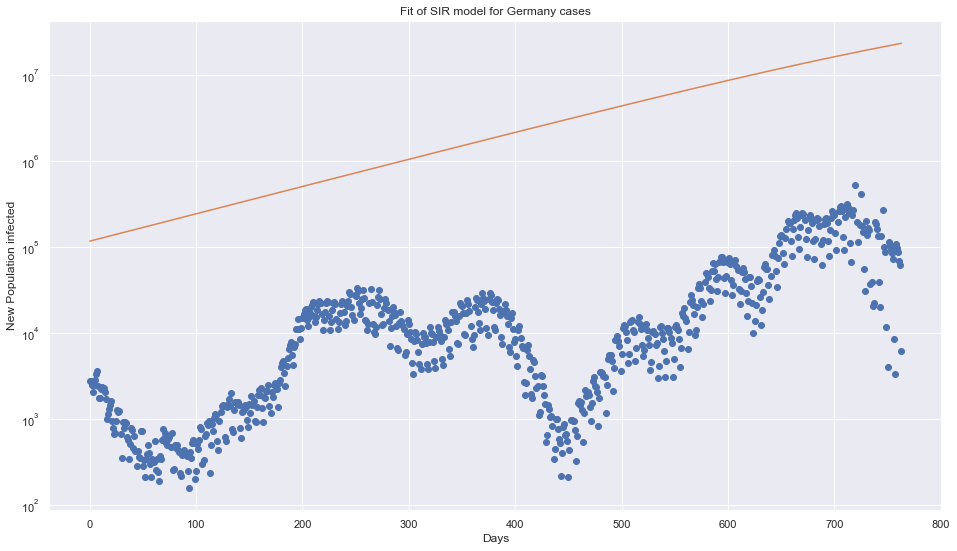

Optimal parameters: beta = 0.007093021900820213  and gamma =  -0.0002423419386660931
Basic Reproduction Number R0  -29.26865213615881


In [74]:
# option 1: ydata is cummulative, thus we need cumulative fitted line
#plt.semilogy(t, ydata, 'o') 
#plt.semilogy(t, np.cumsum(fitted))

# option2: ydata is cummulative, however we would like to have the day to day difference
plt.semilogy(t,np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), 'o')
plt.semilogy(t, fitted)

plt.title("Fit of SIR model for Germany cases")
plt.ylabel("New Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])